# Transect Level Sand Dynamics with BCDs

In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import itertools
from tqdm.notebook import tqdm


from sandpyper.outils import getLoc, getDate,coords_to_points
from sandpyper.dynamics import  steady_state_transect, compute_rBCD_transects, infer_weights

crs_dict_string={"mar":{'init': 'epsg:32754'},
         "leo":{'init': 'epsg:32755'}}

Important: use the full DH, no hotspot

In [50]:
in_file=r"C:\my_packages\doc_data\profiles\markov_tagged_fulldh_df.csv"
dirNameTrans=r"C:\my_packages\doc_data\transects\\"

dataset=pd.read_csv(in_file)

In [51]:
weights_dict={"ee":1,"ed":1,
        "he":1,"hd":1,
        "me":1,"md":1,
        "se":1,"sd":1,
        "ue":1,"ud":1}

label_order=['ed', 'hd', 'md', 'sd', 'ud', 'ue', 'se', 'me', 'he', 'ee']

In [136]:
thresh=6
min_points=50

ss_tr=steady_state_transect(dataset_mar,
                            field_unique_id='geometry',
                            thresh=thresh,
                            min_points=min_points,
                            mode='nnn',
                            unreal="drop"
                           )
ss_tr

<ipython-input-128-124f66f7595b>:385: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for loc in tqdm(dataset.location.unique()):


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 44 points.
eliminating unreliable transects . . . 


,markov_tag,tr_id,p,location,thresh,min_pts,valid_pts
0,hd,3,0.000000,mar,6,50,60
1,he,3,0.117776,mar,6,50,60
2,md,3,0.171556,mar,6,50,60
3,me,3,0.067169,mar,6,50,60
4,sd,3,0.288241,mar,6,50,60
...,...,...,...,...,...,...,...
202,nnn,20,0.164797,mar,6,50,130
203,sd,20,0.086140,mar,6,50,130
204,se,20,0.062872,mar,6,50,130
205,ud,20,0.091124,mar,6,50,130


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!


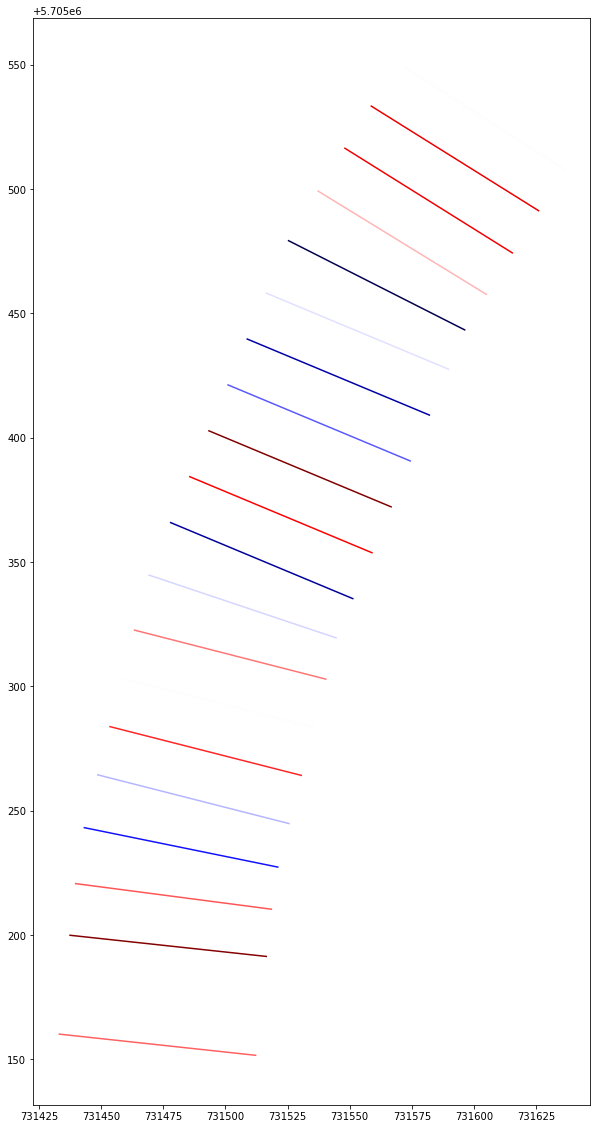

In [137]:
f,ax= plt.subplots(figsize=(20,20))

ss_transects_idx,idx_table=compute_rBCD_transects(dirNameTrans=dirNameTrans,label_order=label_order,
                                                steady_state_tr=ss_tr,
                                                loc='mar',weights_dict=weights_dict)

ss_transects_idx.plot(column='residual', ax=ax, cmap='seismic_r');

In [139]:
n_trans=dataset_mar.groupby(['tr_id'])["dt"].unique().reset_index()
n_trans['n_dt']=[n_trans.iloc[i,-1].shape[0] for i in np.arange(n_trans.shape[0]) ]

ss_transects_idx=pd.merge(ss_transects_idx,n_trans[["tr_id","n_dt"]], on=['tr_id'], how='left')
ss_transects_idx

,location,tr_id,deposition,erosion,residual,geometry,n_dt
0,mar,3,0.562746,0.437254,0.125493,"MULTILINESTRING ((731512.461 5705151.584, 7314...",6
1,mar,5,0.469637,0.530363,-0.060726,"MULTILINESTRING ((731516.749 5705191.354, 7314...",6
2,mar,6,0.443974,0.324034,0.119940,"MULTILINESTRING ((731518.785 5705210.340, 7314...",8
3,mar,7,0.638576,0.297066,0.341510,"MULTILINESTRING ((731521.351 5705227.262, 7314...",7
4,mar,8,0.519564,0.266492,0.253072,"MULTILINESTRING ((731525.857 5705244.754, 7314...",8
5,mar,9,0.448012,0.354373,0.093639,"MULTILINESTRING ((731530.795 5705264.135, 7314...",8
6,mar,10,0.510952,0.298933,0.212020,"MULTILINESTRING ((731535.734 5705283.516, 7314...",8
7,mar,11,0.451879,0.315312,0.136566,"MULTILINESTRING ((731540.659 5705302.846, 7314...",8
8,mar,12,0.543623,0.309869,0.233753,"MULTILINESTRING ((731544.821 5705319.413, 7314...",8
9,mar,13,0.592274,0.164637,0.427638,"MULTILINESTRING ((731551.516 5705335.190, 7314...",8


### Sensitivity analysis

This is needed to properly select a threshold value.

1) compute all combinations

In [140]:
range_thresh=range(0,dataset.dt.unique().shape[0]+1)
range_min_pts=range(0,210,10)
combs = list(itertools.product(range_min_pts,range_thresh))

In [155]:
%%time

ss_tr_big=pd.DataFrame()

for i in tqdm(combs):
    print(f"Working on threshold {i[1]} and min points {i[0]}.")
    try:
        ss_tr=steady_state_transect(dataset_mar,
                     field_unique_id='geometry',
                     thresh=i[1], min_points=i[0], unreal="drop" )
        if ss_tr.shape[0] > 0:
            ss_transects_idx,to_plot=compute_rBCD_transects(dirNameTrans=dirNameTrans,label_order=label_order,
                                                        steady_state_tr=ss_tr,
                                                        loc='mar',weights_dict=weights_dict)
            ss_transects_idx['thresh']=i[1]
            ss_transects_idx['min_pts']=i[0]

            ss_tr_big=pd.concat([ss_tr_big,ss_transects_idx], ignore_index=True)

        else:
            pass
    except:
        print(f"Skipping")
    
ss_tr_big

  0%|          | 0/189 [00:00<?, ?it/s]

Working on threshold 0 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

tr_id 24 has not enough points. Go ahead...
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

tr_id 24 has not enough points. Go ahead...
tr_id 5 has not enough points. Go ahead...
tr_id 4 has not enough points. Go ahead...
tr_id 3 has not enough points. Go ahead...
eliminating unreliable transects . . . 
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 0.


  0%|          | 0/1 [00:00<?, ?it/s]

tr_id 18 has not enough points. Go ahead...
tr_id 13 has not enough points. Go ahead...
tr_id 12 has not enough points. Go ahead...
tr_id 10 has not enough points. Go ahead...
tr_id 9 has not enough points. Go ahead...
tr_id 6 has not enough points. Go ahead...
tr_id 24 has not enough points. Go ahead...
tr_id 23 has not enough points. Go ahead...
tr_id 22 has not enough points. Go ahead...
tr_id 21 has not enough points. Go ahead...
tr_id 7 has not enough points. Go ahead...
tr_id 5 has not enough points. Go ahead...
tr_id 4 has not enough points. Go ahead...
tr_id 3 has not enough points. Go ahead...
eliminating unreliable transects . . . 
Skipping
Working on threshold 0 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 5 not reached. It has 0 points.
tr_id 5 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 0 points.
tr_id 4 has not enough points. Go ahead...
Threshold of points per transect 3 not reached. It has 0 points.
tr_id 3 has not enough points. Go ahead...
eliminating unreliable transects . . . 
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 10.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 5 not reached. It has 0 points.
tr_id 5 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 0 points.
tr_id 4 has not enough points. Go ahead...
Threshold of points per transect 3 not reached. It has 0 points.
tr_id 3 has not enough points. Go ahead...
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 20.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 21 not reached. It has 27 points.
Threshold of points per transect 5 not reached. It has 0 points.
tr_id 5 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 0 points.
tr_id 4 has not enough points. Go ahead...
Threshold of points per transect 3 not reached. It has 0 points.
tr_id 3 has not enough points. Go ahead...
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 30.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 21 not reached. It has 27 points.
Threshold of points per transect 5 not reached. It has 0 points.
tr_id 5 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 0 points.
tr_id 4 has not enough points. Go ahead...
Threshold of points per transect 3 not reached. It has 0 points.
tr_id 3

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 40.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Working on threshold 2 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Done!
 Attaching False ...
 Attaching mar ...

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Done!
Working on threshold 4 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 44 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 22 not reached. It has 45 points.
Threshold of points per transect 21 not reached. It has 27 points.
Threshold of points per transect 5 not reached. It has 0 points.
tr_id 5 has not enough p

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 50.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 60.


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
Working on threshold 5 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 44 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 23 not reached. It has 52 points.
Threshold of points pe

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 8 and min points 60.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 44 points.
Threshold of points per transect 3 not reached. It has 60 points.
eliminating unreliable transects . . . 
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 70.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 23 not reached. It has 52 points.
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Working on threshold 2 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 44 points.
Threshold of points per transect 3 not reached. It has 60 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 80.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



Working on threshold 2 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 4 not reached. It has 44 points.
Threshold of points per transect 3 not reached. It has 60 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 90.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 22 not reached. It has 96 points.
Threshold of points per transect 21 not reached. It has 98 points.
Threshold of points per transect 5 not reached. It has 90 points.
Threshold of points per transect 4 not reached. It has 44 points.
Threshold of points per transect 3 not reached. It has 60 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 100.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 22 not reached. It has 96 points.
Threshold of points per transect 21 not reached. It has 98 points.
Threshold of points per transect 5 not reached. It has 90 points.
Threshold of points per transect 4 not reached. It has 44 points.
Threshold of points per transect 3 not reached. It has 60 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 110.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
Working on threshold 1 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 21 not reached. It has 116 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 23 not reached. It has 114 points.
Threshold of points per transect 22 not reached. It has 96 points.
Threshold of points per transect 21 not reached. It has 98 points.
Threshold of points per transect 5 not reached. It has 90 points.
Threshold of points per transect 4 not reached. It has 44 points.
Threshold of points per transect 3 not reached. It has 60 points.
eliminating unre

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 120.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It has 116 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points per transect 23 not reached. It has 114 points.
Threshold of points per transect 22 not reached. It has 96 points.
Threshold of

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 7 and min points 130.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 140.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 140.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 140.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
Working on threshold 4 and min points 140.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 21 not reached. It has 134 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 140.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It has 116 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 140.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 150.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 150.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 150.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 150.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 22 not reached. It has 144 points.
Threshold of points per transect 21 not reached. It has 134 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 150.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It has 116 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 150.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 160.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 160.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 160.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
Threshold of points per transect 21 not reached. It has 151 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 160.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 22 not reached. It has 144 points.
Threshold of points per transect 21 not reached. It has 134 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 160.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 18 not reached. It has 153 points.
Threshold of points per transect 14 not reached. It has 152 points.
Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 23 not reached. It has 151 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It has 116 points.
Threshold of points per transect 19 not reached. It has 153 points.
Threshold of points per transect 4 not reached. It has 156 points.
eliminating unreliable transects . . . 
 Attaching False ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 160.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 170.


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 170.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 170.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
Threshold of points per transect 21 not reached. It has 151 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 170.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 12 not reached. It has 161 points.
Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 22 not reached. It has 144 points.
Threshold of points per transect 21 not reached. It has 134 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 170.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 163 points.
Threshold of points per transect 18 not reached. It has 153 points.
Threshold of points per transect 14 not reached. It has 152 points.
Threshold of points per transect 13 not reached. It has 163 points.
Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 9 not reached. It has 162 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 23 not reached. It has 151 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It has 116 points.
Threshold of points per transect 19 not reached. It has 153 points.
Threshold of points per transect 7 not reached. It has 164 points.
Threshold of points per transect 4 not reached. It h

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 170.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 180.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 180.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 180.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 39 points.
Threshold of points per transect 22 not reached. It has 171 points.
Threshold of points per transect 21 not reached. It has 151 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 180.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 12 not reached. It has 161 points.
Threshold of points per transect 11 not reached. It has 176 points.
Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 23 not reached. It has 178 points.
Threshold of points per transect 22 not reached. It has 144 points.
Threshold of points per transect 21 not reached. It has 134 points.
Threshold of points per transect 19 not reached. It has 170 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 180.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 163 points.
Threshold of points per transect 18 not reached. It has 153 points.
Threshold of points per transect 16 not reached. It has 171 points.
Threshold of points per transect 14 not reached. It has 152 points.
Threshold of points per transect 13 not reached. It has 163 points.
Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 9 not reached. It has 162 points.
Threshold of points per transect 8 not reached. It has 171 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 23 not reached. It has 151 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It has 116 points.
Threshold of points per transect 19 not reached. It 

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 180.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 1 and min points 190.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 190.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
Threshold of points per transect 22 not reached. It has 182 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 190.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 11 not reached. It has 189 points.
Threshold of points per transect 24 not reached. It has 39 points.
Threshold of points per transect 22 not reached. It has 171 points.
Threshold of points per transect 21 not reached. It has 151 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 190.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 184 points.
Threshold of points per transect 14 not reached. It has 184 points.
Threshold of points per transect 13 not reached. It has 182 points.
Threshold of points per transect 12 not reached. It has 161 points.
Threshold of points per transect 11 not reached. It has 176 points.
Threshold of points per transect 10 not reached. It has 186 points.
Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 23 not reached. It has 178 points.
Threshold of points per transect 22 not reached. It has 144 points.
Threshold of points per transect 21 not reached. It has 134 points.
Threshold of points per transect 19 not reached. It has 170 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 190.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 163 points.
Threshold of points per transect 18 not reached. It has 153 points.
Threshold of points per transect 16 not reached. It has 171 points.
Threshold of points per transect 15 not reached. It has 182 points.
Threshold of points per transect 14 not reached. It has 152 points.
Threshold of points per transect 13 not reached. It has 163 points.
Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 9 not reached. It has 162 points.
Threshold of points per transect 8 not reached. It has 171 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 23 not reached. It has 151 points.
Threshold of points per transect 22 not reached. It has 124 points.
Threshold of points per transect 21 not reached. It 

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 6 and min points 190.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Done!
 Attaching False ...
 Attaching mar ...

C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 Done!
Working on threshold 1 and min points 200.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 79 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...
 Done!


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 2 and min points 200.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 24 not reached. It has 54 points.
Threshold of points per transect 22 not reached. It has 182 points.
Threshold of points per transect 21 not reached. It has 190 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 3 and min points 200.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 198 points.
Threshold of points per transect 12 not reached. It has 192 points.
Threshold of points per transect 11 not reached. It has 189 points.
Threshold of points per transect 24 not reached. It has 39 points.
Threshold of points per transect 22 not reached. It has 171 points.
Threshold of points per transect 21 not reached. It has 151 points.
Threshold of points per transect 19 not reached. It has 198 points.
eliminating unreliable transects . . . 


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Attaching False ...
 Attaching mar ...
 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 4 and min points 200.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 184 points.
Threshold of points per transect 14 not reached. It has 184 points.
Threshold of points per transect 13 not reached. It has 182 points.
Threshold of points per transect 12 not reached. It has 161 points.
Threshold of points per transect 11 not reached. It has 176 points.
Threshold of points per transect 10 not reached. It has 186 points.
Threshold of points per transect 24 not reached. It has 20 points.
Threshold of points per transect 23 not reached. It has 178 points.
Threshold of points per transect 22 not reached. It has 144 points.
Threshold of points per transect 21 not reached. It has 134 points.
Threshold of points per transect 19 not reached. It has 170 points.
eliminating unreliable transects . . . 
 Attaching False ...
 Attaching mar ...


C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\conda3\envs\sandpyper_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


 Done!
 Attaching False ...
 Attaching mar ...
 Done!
Working on threshold 5 and min points 200.


  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 163 points.
Threshold of points per transect 18 not reached. It has 153 points.
Threshold of points per transect 17 not reached. It has 197 points.
Threshold of points per transect 16 not reached. It has 171 points.
Threshold of points per transect 15 not reached. It has 182 points.
Threshold of points per transect 14 not reached. It has 152 points.
Threshold of points per transect 13 not reached. It has 163 points.
Threshold of points per transect 12 not reached. It has 139 points.
Threshold of points per transect 11 not reached. It has 134 points.
Threshold of points per transect 10 not reached. It has 136 points.
Threshold of points per transect 9 not reached. It has 162 points.
Threshold of points per transect 8 not reached. It has 171 points.
Threshold of points per transect 24 not reached. It has 3 points.
Threshold of points per transect 23 not reached. It has 151 points.
Threshold of points per transect 22 not reached. It 

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 130 points.
Threshold of points per transect 18 not reached. It has 93 points.
Threshold of points per transect 17 not reached. It has 128 points.
Threshold of points per transect 16 not reached. It has 116 points.
Threshold of points per transect 15 not reached. It has 134 points.
Threshold of points per transect 14 not reached. It has 114 points.
Threshold of points per transect 13 not reached. It has 110 points.
Threshold of points per transect 12 not reached. It has 114 points.
Threshold of points per transect 11 not reached. It has 100 points.
Threshold of points per transect 10 not reached. It has 97 points.
Threshold of points per transect 9 not reached. It has 121 points.
Threshold of points per transect 8 not reached. It has 126 points.
Threshold of points per transect 6 not reached. It has 126 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold o

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 31 points.
Threshold of points per transect 18 not reached. It has 24 points.
Threshold of points per transect 17 not reached. It has 36 points.
Threshold of points per transect 16 not reached. It has 31 points.
Threshold of points per transect 15 not reached. It has 76 points.
Threshold of points per transect 14 not reached. It has 52 points.
Threshold of points per transect 13 not reached. It has 57 points.
Threshold of points per transect 12 not reached. It has 29 points.
Threshold of points per transect 11 not reached. It has 22 points.
Threshold of points per transect 10 not reached. It has 14 points.
Threshold of points per transect 9 not reached. It has 32 points.
Threshold of points per transect 8 not reached. It has 47 points.
Threshold of points per transect 6 not reached. It has 45 points.
Threshold of points per transect 24 not reached. It has 0 points.
tr_id 24 has not enough points. Go ahead...
Threshold of points pe

  0%|          | 0/1 [00:00<?, ?it/s]

Threshold of points per transect 20 not reached. It has 4 points.
Threshold of points per transect 18 not reached. It has 0 points.
tr_id 18 has not enough points. Go ahead...
Threshold of points per transect 17 not reached. It has 1 points.
Threshold of points per transect 16 not reached. It has 1 points.
Threshold of points per transect 15 not reached. It has 1 points.
Threshold of points per transect 14 not reached. It has 1 points.
Threshold of points per transect 13 not reached. It has 0 points.
tr_id 13 has not enough points. Go ahead...
Threshold of points per transect 12 not reached. It has 0 points.
tr_id 12 has not enough points. Go ahead...
Threshold of points per transect 11 not reached. It has 1 points.
Threshold of points per transect 10 not reached. It has 0 points.
tr_id 10 has not enough points. Go ahead...
Threshold of points per transect 9 not reached. It has 0 points.
tr_id 9 has not enough points. Go ahead...
Threshold of points per transect 8 not reached. It has 1

process,location,tr_id,deposition,erosion,residual,geometry,thresh,min_pts
0,mar,3,0.424080,0.356589,0.067491,"MULTILINESTRING ((731512.461 5705151.584, 7314...",0,0
1,mar,4,0.464567,0.336649,0.127919,"MULTILINESTRING ((731514.605 5705171.469, 7314...",0,0
2,mar,5,0.375602,0.388622,-0.013021,"MULTILINESTRING ((731516.749 5705191.354, 7314...",0,0
3,mar,6,0.296762,0.176257,0.120505,"MULTILINESTRING ((731518.785 5705210.340, 7314...",0,0
4,mar,7,0.460313,0.196794,0.263519,"MULTILINESTRING ((731521.351 5705227.262, 7314...",0,0
...,...,...,...,...,...,...,...,...
2850,mar,9,0.402137,0.281376,0.120761,"MULTILINESTRING ((731530.795 5705264.135, 7314...",4,200
2851,mar,15,0.373944,0.355034,0.018909,"MULTILINESTRING ((731566.920 5705372.105, 7314...",4,200
2852,mar,16,0.460512,0.207404,0.253108,"MULTILINESTRING ((731574.622 5705390.563, 7315...",4,200
2853,mar,17,0.516450,0.193548,0.322902,"MULTILINESTRING ((731582.324 5705409.020, 7315...",4,200


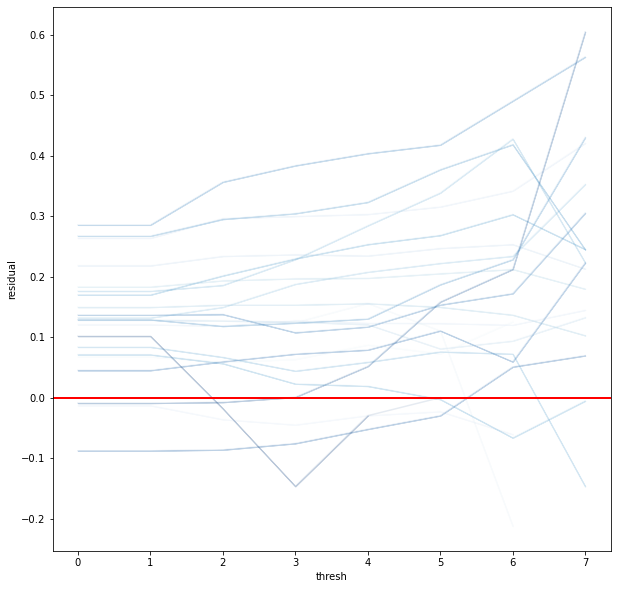

In [148]:
f,ax=plt.subplots(figsize=(10,10))

palette=sb.color_palette("Blues", n_colors=ss_tr_big.tr_id.unique().shape[0])
sb.lineplot(data=ss_tr_big, x='thresh',y='residual', hue='tr_id',
            palette=palette, legend=False, **dict(alpha=0.1),
            ax=ax
)
ax.axhline(y=0, lw=2, c='r');

In [149]:
trs_res_ar=ss_tr_big.groupby(["tr_id","min_pts"])['residual'].apply(np.array).reset_index()
tot_trs=ss_tr_big.groupby(["thresh","min_pts"])['geometry'].count().reset_index()
tot_trs['trs_10']=tot_trs.geometry / 10
zero_crossings=pd.DataFrame([pd.Series({'tr_id':trs_res_ar.loc[i,'tr_id'],
                                        'sign_change_thresh':np.where(np.diff(np.sign(trs_res_ar.iloc[i,-1])))[0][-1]+1,
                                       'min_pts':trs_res_ar.loc[i,'min_pts']}) for i in range(trs_res_ar.shape[0]) if np.where(np.diff(np.sign(trs_res_ar.iloc[i,-1])))[0].shape[0] !=0])
tot_jumps=zero_crossings.groupby(["sign_change_thresh","min_pts"]).count().reset_index() # how many jumps per thresh and minpts


In [150]:
joined=pd.merge(tot_trs,tot_jumps, left_on=['thresh','min_pts'], right_on=['sign_change_thresh','min_pts'], how='left')
joined.rename({'geometry':'tot_trs',
              'tr_id':'tot_jumps'}, axis=1, inplace=True)
joined

,thresh,min_pts,tot_trs,trs_10,sign_change_thresh,tot_jumps
0,0,0,22,2.2,NaN,NaN
1,0,10,22,2.2,NaN,NaN
2,0,20,22,2.2,NaN,NaN
3,0,30,22,2.2,NaN,NaN
4,0,40,22,2.2,NaN,NaN
...,...,...,...,...,...,...
134,7,20,17,1.7,7.0,1.0
135,7,30,13,1.3,7.0,1.0
136,7,40,9,0.9,7.0,1.0
137,7,50,6,0.6,7.0,1.0


<ipython-input-154-b9c83350e522>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax=plt.subplots(figsize=(7,4))


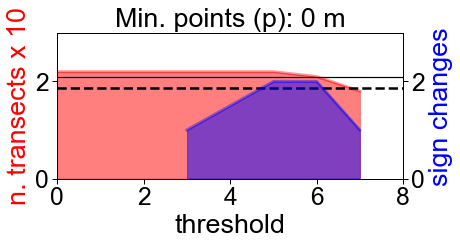

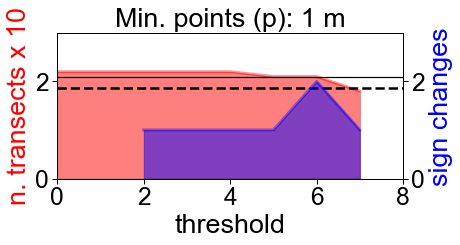

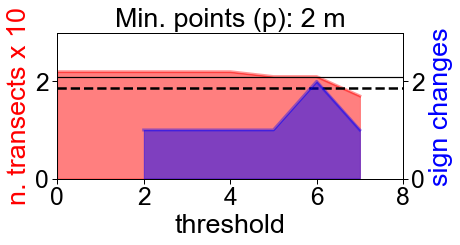

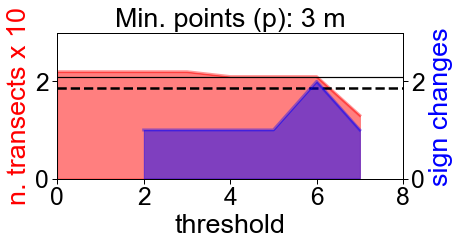

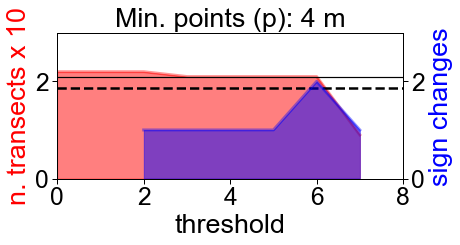

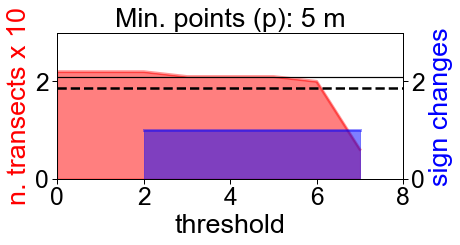

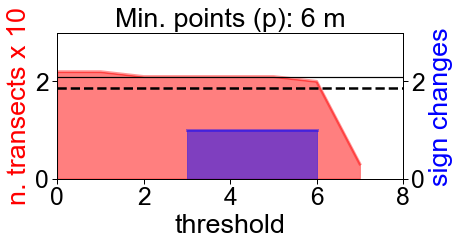

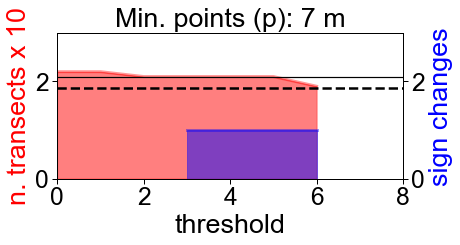

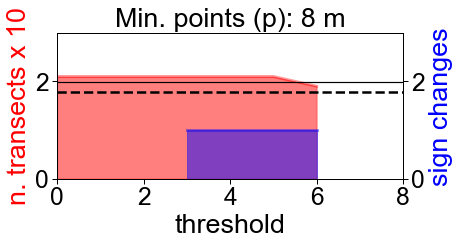

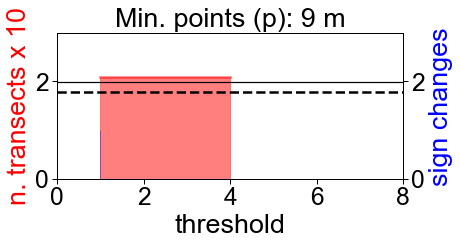

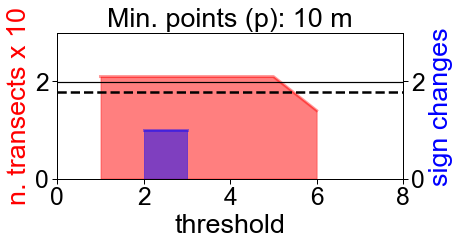

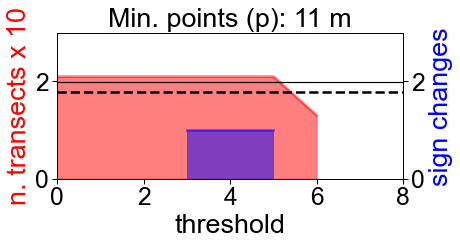

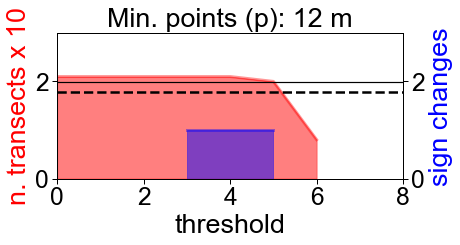

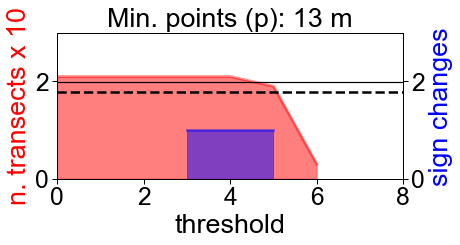

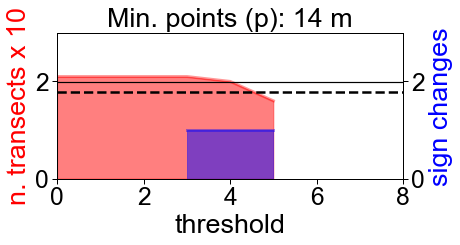

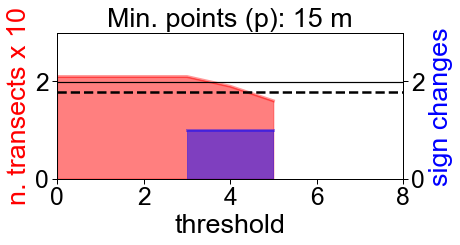

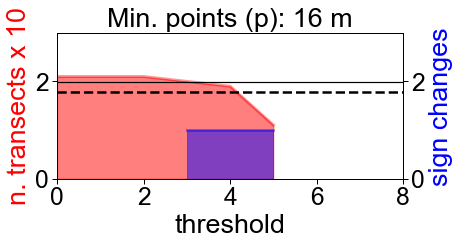

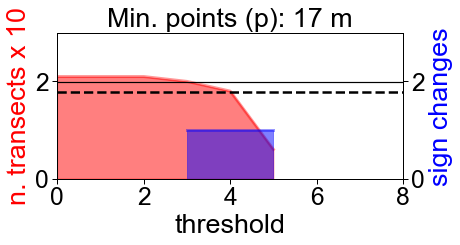

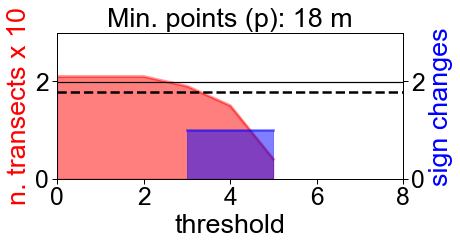

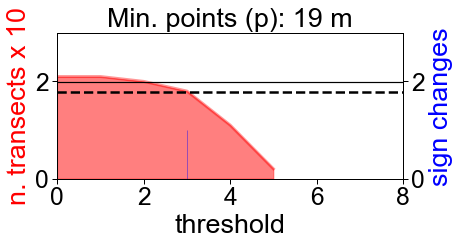

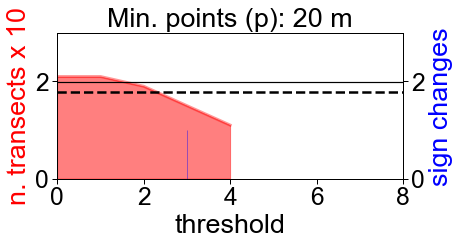

In [154]:
plt.rcParams['font.sans-serif'] = 'Arial'
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = 'sans-serif'
sb.set_context("paper", font_scale=2.8)


x_ticks=[0,2,4,6,8]

q_up_val=0.95
q_low_val=0.85

list_minpts=ss_tr_big.min_pts.unique()

for minpts in list_minpts:

    f,ax=plt.subplots(figsize=(7,4))
    ax2=ax.twinx()
    
    datain=joined.query(f"min_pts=={minpts}")  


    sb.lineplot(x="thresh", y="tot_jumps",ci=None,
                    data=datain,color='b',
                   alpha=.4,linewidth=3,
                ax=ax2, label="sign changes")

    sb.lineplot(data=datain,x='thresh',y='trs_10',
                alpha=.4,color='r',linewidth=3,
                ax=ax,label="transects * 10")
    
    
    kde_x, kde_y = ax.lines[0].get_data()
    kde_x2, kde_y2 = ax2.lines[0].get_data()
    ax.fill_between(kde_x, kde_y,interpolate=True, color='r',alpha=0.5)
    ax2.fill_between(kde_x2, kde_y2,interpolate=True,color='b',alpha=0.5)
    
    ax.axhline((datain.tot_trs.fillna(0).max()*q_up_val)/10,c='k',ls='-',label='95%')
    ax.axhline((datain.tot_trs.fillna(0).max()*q_low_val)/10,c='k',lw=2.5,ls='--',label='85%')
    
    ax.set_ylabel('n. transects x 10', c='r')
    ax.set_xlabel('threshold')
    ax2.set_ylabel('sign changes', c='b')
    ax2.set_ylim(0,3)
    ax.set_ylim(0,3)
    ax.set_xlim(0,8)
    

    plt.tight_layout()
    ax.get_legend().remove()
    ax2.get_legend().remove()
    
    
    plt.xticks(x_ticks)
    savetxt=f"E:\\chapter_4\\SciRep\\submission\\revision_0\\images\\apo_bcds\\sensitivity\\longer\\apo_sensit_minpts_{minpts}.png"
    

    
    ax.set_title(f"Min. points (p): {int(minpts/10)} m")
    plt.tight_layout()
    
#   f.savefig(r'E:\\path\\to\\save\\picture.png', dpi=600);

### Faceting map

<timed exec>:31: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


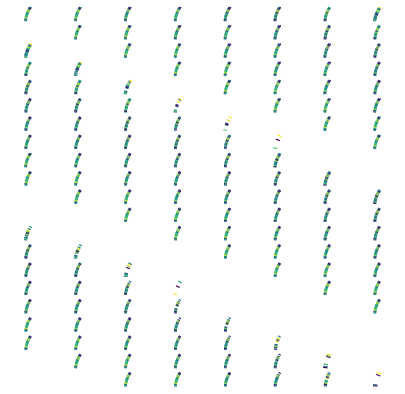

Wall time: 2min 7s


In [191]:
%%time

# Create figure and axes
f, axs = plt.subplots(nrows=len(ss_tr_big.min_pts.unique()),
                      ncols=len(ss_tr_big.thresh.unique()),
                      figsize=(7, 7))

# Make the axes accessible with single indexing
axs = axs.flatten()

# Start the loop over all the variables of interest
for i in range(len(axs)):
    row,col=combs[i]
    # select the axis where the map will go
    ax = axs[i]
    
    # Subset data
    subset=ss_tr_big.query(f"thresh=={col} and min_pts=={row}")
    
    # Plot the map
    if subset.empty:
        pass
    else:
        subset.plot(column='residual', ax=ax)
        
    # Remove axis clutter
    ax.set_axis_off()
    
    # Set the axis title to the name of variable being plotted
    ax.set_title("")
    
# Display the figure
plt.tight_layout()
plt.show()

<AxesSubplot:>

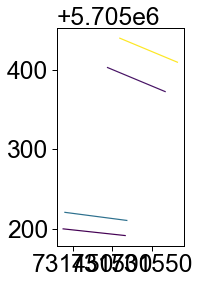

In [190]:
subset.plot(column='residual')

___